# Week 1: Capstone Project Data Science Coursera

This notebook will be used for the capstone project 

In [1]:
import numpy as np
import pandas as pd

print("Hello Capstone Project Course!")

Hello Capstone Project Course!


# Week 3: Segmenting and Clustering Neighborhoods

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from bs4 import BeautifulSoup
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')


Solving environment: - ^C
failed

CondaError: KeyboardInterrupt

Solving environment: - ^C
failed

CondaError: KeyboardInterrupt

Libraries imported.


Read the value from the wiki article


In [3]:
df = pd.read_html('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M')[0]
df.head()

,Postcode,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront


Drop a row if the value of the Borough is 'Not assigned'

In [4]:
df_noNANBorough = df[df.Borough != 'Not assigned']
df_noNANBorough.head()

,Postcode,Borough,Neighbourhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront
5,M6A,North York,Lawrence Heights
6,M6A,North York,Lawrence Manor


Replace all of the neighborhoods that are "Not assigned" with the Borough name

In [5]:
df_noNANNeigh = df_noNANBorough.replace('Not assigned', df.Borough)
df_noNANNeigh.head()

,Postcode,Borough,Neighbourhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront
5,M6A,North York,Lawrence Heights
6,M6A,North York,Lawrence Manor


Group by Postal code, separating neighborhoods with commas

In [6]:
df_grouped = df_noNANNeigh.groupby(['Postcode', 'Borough'])['Neighbourhood'].apply(', '.join).reset_index()
df_grouped.head()

,Postcode,Borough,Neighbourhood
0,M1B,Scarborough,"Rouge, Malvern"
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union"
2,M1E,Scarborough,"Guildwood, Morningside, West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae


In [7]:
df_grouped.shape

(103, 3)

## Add in Longitude and Latitude

In [8]:
longLat = pd.read_csv('http://cocl.us/Geospatial_data')
longLat.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [9]:
df_plusll = pd.concat([df_grouped, longLat], axis = 1)
df_ll = df_plusll.drop(['Postal Code'], axis = 1)
df_ll

,Postcode,Borough,Neighbourhood,Latitude,Longitude
0,M1B,Scarborough,"Rouge, Malvern",43.806686,-79.194353
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476
5,M1J,Scarborough,Scarborough Village,43.744734,-79.239476
6,M1K,Scarborough,"East Birchmount Park, Ionview, Kennedy Park",43.727929,-79.262029
7,M1L,Scarborough,"Clairlea, Golden Mile, Oakridge",43.711112,-79.284577
8,M1M,Scarborough,"Cliffcrest, Cliffside, Scarborough Village West",43.716316,-79.239476
9,M1N,Scarborough,"Birch Cliff, Cliffside West",43.692657,-79.264848


## Week 4 and 5: Cluster the Toronto Neighborhoods and Analyze by Yoga Studio Composition

In [10]:
#Dataframe of Boroughs that contain the word Toronto
df_toronto = df_ll[(df['Borough'].str.contains(' Toronto'))]
df_toronto

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app


,Postcode,Borough,Neighbourhood,Latitude,Longitude
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476
7,M1L,Scarborough,"Clairlea, Golden Mile, Oakridge",43.711112,-79.284577
16,M1X,Scarborough,Upper Rouge,43.836125,-79.205636
17,M2H,North York,Hillcrest Village,43.803762,-79.363452
33,M3N,North York,Downsview Northwest,43.761631,-79.520999
46,M4R,Central Toronto,North Toronto West,43.715383,-79.405678
47,M4S,Central Toronto,Davisville,43.704324,-79.388790
56,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306
57,M5G,Downtown Toronto,Central Bay Street,43.657952,-79.387383
67,M5T,Downtown Toronto,"Chinatown, Grange Park, Kensington Market",43.653206,-79.400049


Get Long and Lat of Toronto


In [11]:
address = 'Toronto, CA'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))


The geograpical coordinate of Toronto are 43.653963, -79.387207.


Map of Toronto with superimposed neighborhoods

In [12]:
# create map of Toronto using latitude and longitude values
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(df_toronto['Latitude'], df_toronto['Longitude'], df_toronto['Borough'], df_toronto['Neighbourhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto


In [13]:
# The code was removed by Watson Studio for sharing.

In [14]:
#Radius/Number of venues
radius = 500
LIMIT = 100

In [15]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                  'Neighbourhood Latitude', 
                  'Neighbourhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [16]:
toronto_venues = getNearbyVenues(names=df_toronto['Neighbourhood'],
                                 latitudes=df_toronto['Latitude'],
                                 longitudes=df_toronto['Longitude'])

Cedarbrae
Clairlea, Golden Mile, Oakridge
Upper Rouge
Hillcrest Village
Downsview Northwest
North Toronto West
Davisville
Berczy Park
Central Bay Street
Chinatown, Grange Park, Kensington Market
CN Tower, Bathurst Quay, Island airport, Harbourfront West, King and Spadina, Railway Lands, South Niagara
Stn A PO Boxes 25 The Esplanade
First Canadian Place, Underground city
Lawrence Heights, Lawrence Manor
High Park, The Junction South
Parkdale, Roncesvalles
Runnymede, Swansea
Queen's Park
Canada Post Gateway Processing Centre
Humber Summit
Emery, Humberlea
Weston
Westmount
Kingsview Village, Martin Grove Gardens, Richview Gardens, St. Phillips
Albion Gardens, Beaumond Heights, Humbergate, Jamestown, Mount Olive, Silverstone, South Steeles, Thistletown
Northwest


In [17]:
#Check Size and how many categories
print(toronto_venues.shape)
toronto_venues.head()

(689, 7)


,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Cedarbrae,43.773136,-79.239476,Federick Restaurant,43.774697,-79.241142,Hakka Restaurant
1,Cedarbrae,43.773136,-79.239476,Drupati's Roti & Doubles,43.775222,-79.241678,Caribbean Restaurant
2,Cedarbrae,43.773136,-79.239476,Thai One On,43.774468,-79.241268,Thai Restaurant
3,Cedarbrae,43.773136,-79.239476,Centennial Recreation Centre,43.774593,-79.236500,Athletics & Sports
4,Cedarbrae,43.773136,-79.239476,TD Canada Trust,43.774830,-79.241251,Bank


In [18]:
toronto_venues.groupby('Neighbourhood').count()

,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighbourhood,,,,,,
"Albion Gardens, Beaumond Heights, Humbergate, Jamestown, Mount Olive, Silverstone, South Steeles, Thistletown",9,9,9,9,9,9
Berczy Park,56,56,56,56,56,56
"CN Tower, Bathurst Quay, Island airport, Harbourfront West, King and Spadina, Railway Lands, South Niagara",18,18,18,18,18,18
Canada Post Gateway Processing Centre,13,13,13,13,13,13
Cedarbrae,9,9,9,9,9,9
Central Bay Street,79,79,79,79,79,79
"Chinatown, Grange Park, Kensington Market",89,89,89,89,89,89
"Clairlea, Golden Mile, Oakridge",10,10,10,10,10,10
Davisville,34,34,34,34,34,34


In [19]:
print('There are {} uniques categories.'.format(len(toronto_venues['Venue Category'].unique())))

There are 182 uniques categories.


In [20]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Neighborhood'] = toronto_venues['Neighbourhood'] 

# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

toronto_onehot.head()


,Neighborhood,Accessories Store,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bistro,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Business Service,Butcher,Café,Cajun / Creole Restaurant,Caribbean Restaurant,Carpet Store,Cheese Shop,Chinese Restaurant,Church,Clothing Store,Cocktail Bar,Coffee Shop,College Auditorium,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Creperie,Cuban Restaurant,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Dumpling Restaurant,Eastern European Restaurant,Empanada Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Food,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Gaming Cafe,Gas Station,Gastropub,General Travel,Gift Shop,Gluten-free Restaurant,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hakka Restaurant,Harbor / Marina,Health Food Store,Hospital,Hostel,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Juice Bar,Korean Restaurant,Latin American Restaurant,Liquor Store,Lounge,Massage Studio,Mediterranean Restaurant,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Movie Theater,Museum,Music Venue,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Park,Pharmacy,Pizza Place,Plane,Plaza,Poke Place,Pool,Portuguese Restaurant,Post Office,Poutine Place,Pub,Ramen Restaurant,Record Shop,Rental Car Location,Restaurant,Salad Place,Salon / Barbershop,Sandwich Place,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Soccer Field,Spa,Speakeasy,Sporting Goods Shop,Steakhouse,Sushi Restaurant,Tailor Shop,Tea Room,Thai Restaurant,Theater,Toy / Game Store,Train Station,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wine Bar,Wings Joint,Women's Store,Yoga Studio
0,Cedarbrae,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Cedarbrae,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Cedarbrae,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,Cedarbrae,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [21]:
toronto_onehot.shape

(689, 183)

Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [22]:
toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()
toronto_grouped


,Neighborhood,Accessories Store,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bistro,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Business Service,Butcher,Café,Cajun / Creole Restaurant,Caribbean Restaurant,Carpet Store,Cheese Shop,Chinese Restaurant,Church,Clothing Store,Cocktail Bar,Coffee Shop,College Auditorium,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Creperie,Cuban Restaurant,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Dumpling Restaurant,Eastern European Restaurant,Empanada Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Food,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Gaming Cafe,Gas Station,Gastropub,General Travel,Gift Shop,Gluten-free Restaurant,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hakka Restaurant,Harbor / Marina,Health Food Store,Hospital,Hostel,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Juice Bar,Korean Restaurant,Latin American Restaurant,Liquor Store,Lounge,Massage Studio,Mediterranean Restaurant,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Movie Theater,Museum,Music Venue,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Park,Pharmacy,Pizza Place,Plane,Plaza,Poke Place,Pool,Portuguese Restaurant,Post Office,Poutine Place,Pub,Ramen Restaurant,Record Shop,Rental Car Location,Restaurant,Salad Place,Salon / Barbershop,Sandwich Place,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Soccer Field,Spa,Speakeasy,Sporting Goods Shop,Steakhouse,Sushi Restaurant,Tailor Shop,Tea Room,Thai Restaurant,Theater,Toy / Game Store,Train Station,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wine Bar,Wings Joint,Women's Store,Yoga Studio
0,"Albion Gardens, Beaumond Heights, Humbergate, ...",0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.111111,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.00,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.111111,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.111111,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.0,0.000000,0.000000,0.222222,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.111111,0.222222,0.000000,0.00,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.

In [23]:
toronto_grouped.shape

(25, 183)

In [24]:
num_top_venues = 5

for hood in toronto_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = toronto_grouped[toronto_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')


----Albion Gardens, Beaumond Heights, Humbergate, Jamestown, Mount Olive, Silverstone, South Steeles, Thistletown----
                 venue  freq
0        Grocery Store  0.22
1          Pizza Place  0.22
2       Sandwich Place  0.11
3           Beer Store  0.11
4  Fried Chicken Joint  0.11


----Berczy Park----
                venue  freq
0         Coffee Shop  0.09
1        Cocktail Bar  0.05
2         Cheese Shop  0.04
3              Bakery  0.04
4  Seafood Restaurant  0.04


----CN Tower, Bathurst Quay, Island airport, Harbourfront West, King and Spadina, Railway Lands, South Niagara----
              venue  freq
0   Airport Service  0.17
1    Airport Lounge  0.11
2  Airport Terminal  0.11
3             Plane  0.06
4          Boutique  0.06


----Canada Post Gateway Processing Centre----
                       venue  freq
0                Coffee Shop  0.15
1               Intersection  0.15
2                      Hotel  0.15
3                        Gym  0.08
4  Middle Eastern Rest

In [25]:
# Sort Desc
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]


In [26]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = toronto_grouped['Neighborhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()


,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Albion Gardens, Beaumond Heights, Humbergate, ...",Grocery Store,Pizza Place,Fried Chicken Joint,Sandwich Place,Pharmacy,Fast Food Restaurant,Beer Store,Comfort Food Restaurant,Discount Store,Diner
1,Berczy Park,Coffee Shop,Cocktail Bar,Seafood Restaurant,Cheese Shop,Café,Restaurant,Bakery,Beer Bar,Farmers Market,Basketball Stadium
2,"CN Tower, Bathurst Quay, Island airport, Harbo...",Airport Service,Airport Lounge,Airport Terminal,Rental Car Location,Bar,Boat or Ferry,Coffee Shop,Plane,Harbor / Marina,Sculpture Garden
3,Canada Post Gateway Processing Centre,Coffee Shop,Hotel,Intersection,Gym,Fried Chicken Joint,Sandwich Place,Middle Eastern Restaurant,American Restaurant,Mediterranean Restaurant,Burrito Place
4,Cedarbrae,Gas Station,Thai Restaurant,Hakka Restaurant,Lounge,Caribbean Restaurant,Bank,Bakery,Athletics & Sports,Fried Chicken Joint,American Restaurant


# Run kMeans to Cluster the Neighborhoods

In [27]:
# set number of clusters
kclusters = 5

toronto_grouped_clustering = toronto_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

neighborhoods_venues_sorted.columns

Index(['Neighborhood', '1st Most Common Venue', '2nd Most Common Venue',
       '3rd Most Common Venue', '4th Most Common Venue',
       '5th Most Common Venue', '6th Most Common Venue',
       '7th Most Common Venue', '8th Most Common Venue',
       '9th Most Common Venue', '10th Most Common Venue'],
      dtype='object')

In [28]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'ClusterVals', kmeans.labels_)

toronto_merged = df_toronto

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
toronto_merged = toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighbourhood')

toronto_merged.head() # check the last columns!


,Postcode,Borough,Neighbourhood,Latitude,Longitude,ClusterVals,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476,0.0,Gas Station,Thai Restaurant,Hakka Restaurant,Lounge,Caribbean Restaurant,Bank,Bakery,Athletics & Sports,Fried Chicken Joint,American Restaurant
7,M1L,Scarborough,"Clairlea, Golden Mile, Oakridge",43.711112,-79.284577,0.0,Bakery,Bus Line,Ice Cream Shop,Metro Station,Bus Station,Park,Intersection,Soccer Field,Yoga Studio,Diner
16,M1X,Scarborough,Upper Rouge,43.836125,-79.205636,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,M2H,North York,Hillcrest Village,43.803762,-79.363452,0.0,Dog Run,Golf Course,Pool,Fast Food Restaurant,Mediterranean Restaurant,College Auditorium,Clothing Store,Diner,Dim Sum Restaurant,Dessert Shop
33,M3N,North York,Downsview Northwest,43.761631,-79.520999,0.0,Discount Store,Liquor Store,Grocery Store,Gym / Fitness Center,Yoga Studio,Cosmetics Shop,Diner,Dim Sum Restaurant,Dessert Shop,Department Store


In [29]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighbourhood'], toronto_merged['ClusterVals']):
    if(np.isnan(cluster)):
        cluster = 0
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster-1)],
        fill=True,
        fill_color=rainbow[int(cluster-1)],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters


# 5. Examine Clusters

In [30]:
#Cluster 1
toronto_merged.loc[toronto_merged['ClusterVals'] == 0, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,ClusterVals,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,Scarborough,0.0,Gas Station,Thai Restaurant,Hakka Restaurant,Lounge,Caribbean Restaurant,Bank,Bakery,Athletics & Sports,Fried Chicken Joint,American Restaurant
7,Scarborough,0.0,Bakery,Bus Line,Ice Cream Shop,Metro Station,Bus Station,Park,Intersection,Soccer Field,Yoga Studio,Diner
17,North York,0.0,Dog Run,Golf Course,Pool,Fast Food Restaurant,Mediterranean Restaurant,College Auditorium,Clothing Store,Diner,Dim Sum Restaurant,Dessert Shop
33,North York,0.0,Discount Store,Liquor Store,Grocery Store,Gym / Fitness Center,Yoga Studio,Cosmetics Shop,Diner,Dim Sum Restaurant,Dessert Shop,Department Store
46,Central Toronto,0.0,Clothing Store,Sporting Goods Shop,Coffee Shop,Yoga Studio,Café,Mexican Restaurant,Park,Dessert Shop,Diner,Rental Car Location
47,Central Toronto,0.0,Sandwich Place,Dessert Shop,Pizza Place,Café,Sushi Restaurant,Coffee Shop,Italian Restaurant,Gym,Diner,Deli / Bodega
56,Downtown Toronto,0.0,Coffee Shop,Cocktail Bar,Seafood Restaurant,Cheese Shop,Café,Restaurant,Bakery,Beer Bar,Farmers Market,Basketball Stadium
57,Downtown Toronto,0.0,Coffee Shop,Italian Restaurant,Burger Joint,Japanese Restaurant,Juice Bar,Ice Cream Shop,Sandwich Place,Chinese Restaurant,Salad Place,Bubble Tea Shop
67,Downtown Toronto,0.0,Bar,Vietnamese Restaurant,Café,Bakery,Chinese Restaurant,Coffee Shop,Vegetarian / Vegan Restaurant,Dumpling Restaurant,Mexican Restaurant,Farmers Market
68,Downtown Toronto,0.0,Airport Service,Airport Lounge,Airport Terminal,Rental Car Location,Bar,Boat or Ferry,Coffee Shop,Plane,Harbor / Marina,Sculpture Garden


In [31]:
#Cluster 2
toronto_merged.loc[toronto_merged['ClusterVals'] == 1, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,ClusterVals,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
98,York,1.0,Convenience Store,Yoga Studio,Creperie,Distribution Center,Discount Store,Diner,Dim Sum Restaurant,Dessert Shop,Department Store,Deli / Bodega


In [32]:
#Cluster 3
toronto_merged.loc[toronto_merged['ClusterVals'] == 2, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,ClusterVals,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
96,North York,2.0,Empanada Restaurant,Pizza Place,Yoga Studio,Convenience Store,Diner,Dim Sum Restaurant,Dessert Shop,Department Store,Deli / Bodega,Cuban Restaurant
99,Etobicoke,2.0,Pizza Place,Chinese Restaurant,Sandwich Place,Discount Store,Coffee Shop,Cosmetics Shop,Diner,Dim Sum Restaurant,Dessert Shop,Department Store
100,Etobicoke,2.0,Sandwich Place,Mobile Phone Shop,Bus Line,Pizza Place,Yoga Studio,Cosmetics Shop,Diner,Dim Sum Restaurant,Dessert Shop,Department Store
101,Etobicoke,2.0,Grocery Store,Pizza Place,Fried Chicken Joint,Sandwich Place,Pharmacy,Fast Food Restaurant,Beer Store,Comfort Food Restaurant,Discount Store,Diner


In [33]:
#Cluster 4
toronto_merged.loc[toronto_merged['ClusterVals'] == 3, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,ClusterVals,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
102,Etobicoke,3.0,Rental Car Location,Drugstore,Bar,Yoga Studio,Dog Run,Discount Store,Diner,Dim Sum Restaurant,Dessert Shop,Department Store


In [34]:
#Cluster 5
toronto_merged.loc[toronto_merged['ClusterVals'] == 4, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,ClusterVals,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
97,North York,4.0,Baseball Field,Yoga Studio,Creperie,Distribution Center,Discount Store,Diner,Dim Sum Restaurant,Dessert Shop,Department Store,Deli / Bodega


In [35]:
toronto_merged

,Postcode,Borough,Neighbourhood,Latitude,Longitude,ClusterVals,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476,0.0,Gas Station,Thai Restaurant,Hakka Restaurant,Lounge,Caribbean Restaurant,Bank,Bakery,Athletics & Sports,Fried Chicken Joint,American Restaurant
7,M1L,Scarborough,"Clairlea, Golden Mile, Oakridge",43.711112,-79.284577,0.0,Bakery,Bus Line,Ice Cream Shop,Metro Station,Bus Station,Park,Intersection,Soccer Field,Yoga Studio,Diner
16,M1X,Scarborough,Upper Rouge,43.836125,-79.205636,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,M2H,North York,Hillcrest Village,43.803762,-79.363452,0.0,Dog Run,Golf Course,Pool,Fast Food Restaurant,Mediterranean Restaurant,College Auditorium,Clothing Store,Diner,Dim Sum Restaurant,Dessert Shop
33,M3N,North York,Downsview Northwest,43.761631,-79.520999,0.0,Discount Store,Liquor Store,Grocery Store,Gym / Fitness Center,Yoga Studio,Cosmetics Shop,Diner,Dim Sum Restaurant,Dessert Shop,Department Store
46,M4R,Central Toronto,North Toronto West,43.715383,-79.405678,0.0,Clothing Store,Sporting Goods Shop,Coffee Shop,Yoga Studio,Café,Mexican Restaurant,Park,Dessert Shop,Diner,Rental Car Location
47,M4S,Central Toronto,Davisville,43.704324,-79.388790,0.0,Sandwich Place,Dessert Shop,Pizza Place,Café,Sushi Restaurant,Coffee Shop,Italian Restaurant,Gym,Diner,Deli / Bodega
56,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306,0.0,Coffee Shop,Cocktail Bar,Seafood Restaurant,Cheese Shop,Café,Restaurant,Bakery,Beer Bar,Farmers Market,Basketball Stadium
57,M5G,Downtown Toronto,Central Bay Street,43.657952,-79.387383,0.0,Coffee Shop,Italian Restaurant,Burger Joint,Japanese Restaurant,Juice Bar,Ice Cream Shop,Sandwich Place,Chinese Restaurant,Salad Place,Bubble Tea Shop
67,M5T,Downtown Toronto,"Chinatown, Grange Park, Kensington Market",43.653206,-79.400049,0.0,Bar,Vietnamese Restaurant,Café,Bakery,Chinese Restaurant,Coffee Shop,Vegetarian / Vegan Restaurant,Dumpling Restaurant,Mexican Restaurant,Farmers Market


Group data sets int Bad (Yoga studios in 1 or 2) or Good (Yoga studios in 3 and 4)

In [45]:
yoga1or2 = toronto_merged[(toronto_merged['1st Most Common Venue'] == 'Yoga Studio')|(toronto_merged['2nd Most Common Venue'] == 'Yoga Studio')]
yoga3or4 = toronto_merged[(toronto_merged['3rd Most Common Venue'] == 'Yoga Studio')|(toronto_merged['3rd Most Common Venue'] == 'Yoga Studio')]


Explore which clusters each of the data sets belong to.

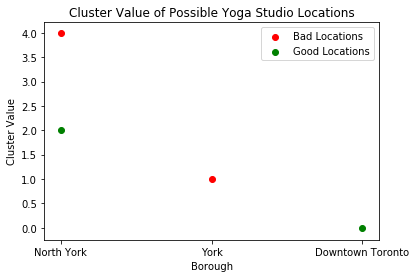

In [52]:
import matplotlib.pyplot as plt

plt.scatter(yoga1or2['Borough'], yoga1or2['ClusterVals'],color = 'r')
plt.scatter(yoga3or4['Borough'], yoga3or4['ClusterVals'],color = 'g')
plt.title('Cluster Value of Possible Yoga Studio Locations')
plt.xlabel('Borough')
plt.ylabel('Cluster Value')
plt.legend(['Bad Locations', 'Good Locations'])

# Results
According to this plot, choosing a region from cluster 0 or 2 would have a high likihood for producing a successful yoga studio based on the popularity of yoga in these places. However, one borough in North York is overpopulated with yoga studios, so likely choosing a location in Downtown Toronto, or in cluster 0 if that location is unavailable or out of price range, will provide the user with a location where yoga is becoming increasingly popular, allowing them to grow their customer base.

# Future Directions: 
This analysis only takes into account other yoga studios. Other factors such as cost and proximity to other services must be taken into account to produce a more successful and accurate model of yoga studio success.